## Метки качества логистической регрессии

### R² (псевдо-R2)

Показать **R²** характеризует, насколько хорошо та или иная **независимая** переменная объясняет **зависимую**.

Применительно к воздествию хим. веществ это означает, что мы хотим оценить, в какой степени **продолжительность воздествия** объясняет проявление **симптомов**.

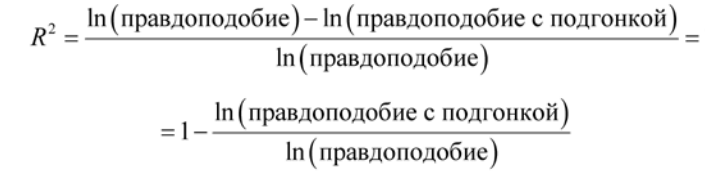

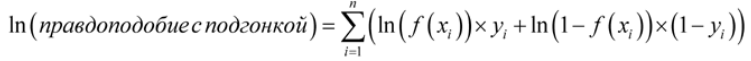
f(xi) - логистическая функция для заданного аргумента xi.

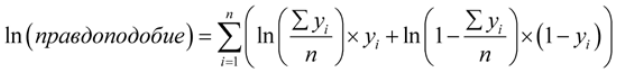



In [ ]:
# Вычисление логарифмического правдоподобия с подгонкой
from math import log, exp
import pandas as pd

patient_data = pd.read_csv("https://bit.ly/33ebs2R", delimiter=",").itertuples()

b0 = -3.175
b1 = 0.692

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# Сумма логарифмических правдоподобий
log_likelihood_fit = 0.0
for p in patient_data:
    if p.y == 1.0:
        log_likelihood_fit += log(logistic_function(p.x))
    elif p.y == 0.0:
        log_likelihood_fit += log(1.0 - logistic_function(p.x))

print(log_likelihood_fit)

-9.946174439227


In [2]:
# Логарифмическое правдоподобие для выборки пациентов
import pandas as pd
from math import log, exp

patient_data = list(pd.read_csv("https://bit.ly/33ebs2R", delimiter=",") \
                    .itertuples())

likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = 0.0

for p in patient_data:
    if p.y == 1.0:
        log_likelihood += log(likelihood)
    elif p.y == 0.0:
        log_likelihood += log(1.0 - likelihood)

print(log_likelihood)

-14.341070198709906


In [3]:
# Вычисление R² для логистической регрессии
import pandas as pd
from math import log, exp

patient_data = list(pd.read_csv("https://bit.ly/33ebs2R", delimiter=",") \
 .itertuples())

# Коэффициенты подогнанной логистической регрессии
b0 = -3.175805042563378
b1 = 0.6926893863085584

def logistic_function(x):
 p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
 return p

# Логарифмическое правдоподобие с подгонкой
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
 log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
 for p in patient_data)

# Логарифмическое правдоподобие без подгонки
likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) \
                     for p in patient_data)
 
# Вычисляем R²
r2 = 1 - (log_likelihood_fit / log_likelihood)
print(r2)

0.3064561053776833


#### Объясняет или нет?

r² = 0.3 - это ближе к 0. Таким образом можно сделать вывод, что **продолжительность воздействия плохо прогнозирует симптомы**, потому что R² состоявляет всего 0.3. Должны существовать другие переменные, помимо продолжительности воздействия, которые лучше прогнозируют, проявятся ли симптомы. Это вполне логично, потому что на большей части интервала наблюдаемых данных встречаются пациенты как с симптомами, так и без симптомов, как видно на картинке. 

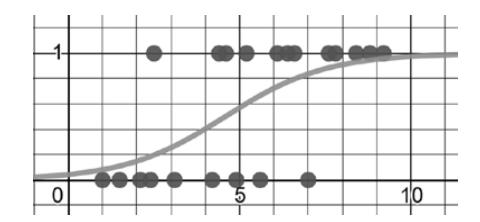

Но если бы данные были четко разделены и исходы *1 и 0 не перекрывали друг друга*, как показано на рисунке, то мы бы получили *идеальное значение R²*, равное 1.

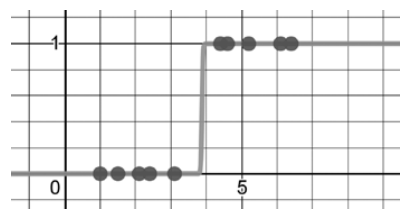


Нужно выяснить, насколько вероятно, что эти данные возникли слуйчайно, а не в результате объективной взаимосвязи. Это значит, что надо вычислить **p-значение**.

### p-значения

Для это нам понадобится изучать новое нормальное распределение вероятностей **распределение хи-квадрат** и обозначается **X²**.

Если взять каждое значение стандартного нормального распределения (со сред-
ним 0 и стандартным отклонением 1) и возвести его в квадрат, то получится 
распределение с одной степенью свободы. Для наших целей количество 
степеней свободы зависит от количества параметров n в логистической регрессии 
и равно .

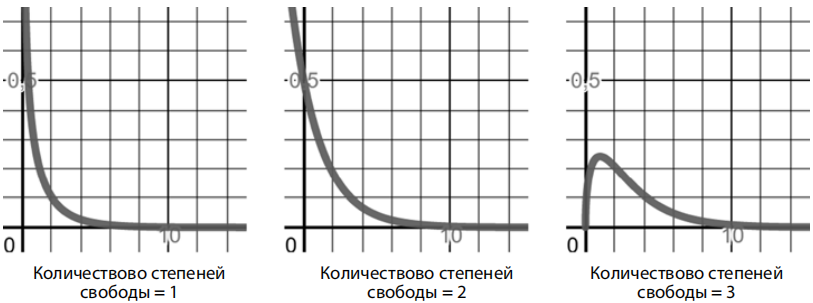

**Наш пример:**

Кол-во степеней свободы: 2 - 1 = 1

Формула, по которой рассчитывается нужное значение X²:
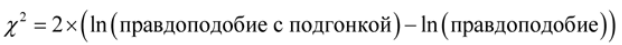

Найдем соотвествующую ему вероятность из распределенения X². Это и будет p-значенение:
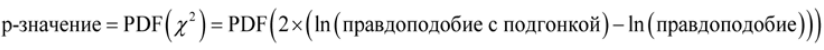

In [6]:
# Вычисление p-значения для логистической регрессии
import pandas as pd
from math import log, exp
from scipy.stats import chi2

patient_data = list(pd.read_csv("https://bit.ly/33ebs2R", delimiter=",").itertuples())

# Коэффицинты подогнанной логистической регрессии
b0 = -3.175
b1 = 0.692

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# Логарифмическое правдопободие с подгонкой
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                         for p in patient_data)

# Логарифмическое правдоподобие без подгонки
likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = sum(log(likelihood) * p.y +
                     log(1.0 - likelihood) * (1.0 - p.y) \
                        for p in patient_data)
 
# Вычисляем p-значение
chi2_input = 2 * (log_likelihood_fit - log_likelihood)
p_value = chi2.pdf(chi2_input, 1) # одна степень свободы (n - 1)
print(p_value)



0.0016605111714522072


Итак, **p-значение** нашей логистической регрессии равно 0.0016, и если задан уровень значимости 0.05, то можно сказать, что взаимосвязь между продолжительностью воздействия химикатов и проявлением симптомов отравления **статическим значима и не является случайностью**.

### Обучающая и тестовая выборка

Этот способ оценить эффективность логистической регрессии больше отвечает духу машинного обучения. Хотя полагаться на такие традиционные статические показатели, как R² и p-значения - хорошая идея, она становится менее практичной, когда вы имеете дело с большим количеством переменных. Тут имеет смысл разделить набор данных на две выборки.

In [12]:
# Логистическая регрессия с трехкратной валидацией
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# Загружаем данные
df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

# random_state — затравочное значение для генератора случайных чисел
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty=None)
results = cross_val_score(model, X, Y, cv=kfold)

print(f"Средняя точность: {results.mean():.3f} (ст. откл.= {results.std():.3f})")

Средняя точность: 0.611 (ст. откл.= 0.000)


На примере **выполняется логистическая регрессия** на наборе данных о за-
нятости сотрудников, но данные разбиваются на трети, и каждая треть пооче-
редно используется в качестве тестовой выборки. Наконец, чтобы обобщить 
три значения точности, мы вычисляем их **среднее** и **стандартное отклонение**.

#### *Почему точность - плохая метрика для задач классификации?*

В компании сто сотрудников, из которых одного зовут Майкл, а другого — Сэм. Модель ошибочно предсказывает, что Майкл уволится, но в итоге увольняется Сэм. Какова точность модели? Она равна 98 %, потому что на сто сотрудников приходится 
только два неверных прогноза.

### **Матрица ошибок**

**Матрица ошибок** — это таблица, в которой прогнозы сопоставляются с факти-
ческими результатами и подсчитываются результаты четырех типов: *истинно 
положительные*, *истинно отрицательные*, *ложноположительные* (ошибки первого 
рода) и *ложноотрицательные* (ошибки второго рода) результаты.

Из матрицы ошибок можно вывести всевозможные полезные метрики, помимо 
точности. Можно легко заметить, что **прецизионность** (какая доля спрогнози-
рованных положительных результатов спрогнозирована правильно) и **чувствительность** (какая доля фактических положительных результатов была верно спрогнозирована) равны 0, а это значит, что наша модель машинного обучения 
совершенно **не оправдала себя** на положительных прогнозах.

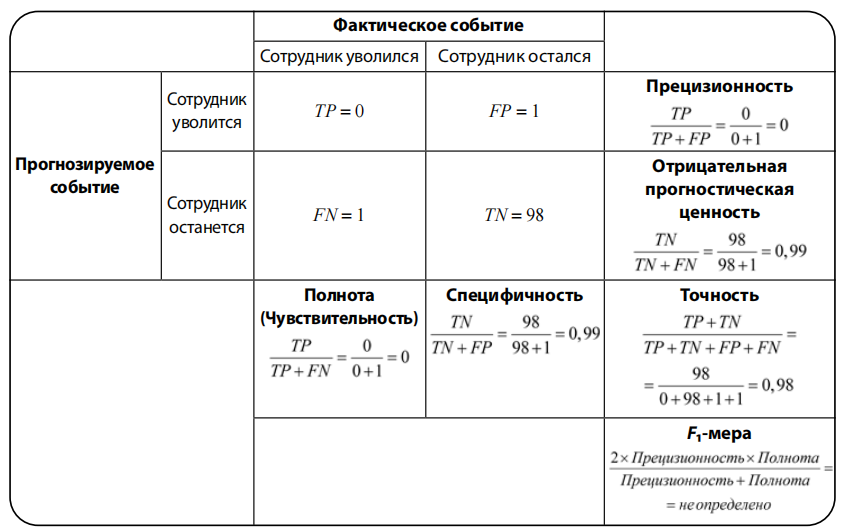



In [1]:
# Матрица ошибок для тестовой выборки с помощью scikit-learn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://bit.ly/3cManTi", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression(solver="liblinear")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=10)

model.fit(X_train, Y_train)
prediction = model.predict(X_test)

matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print(matrix)

[[6 3]
 [4 5]]


Матрица ошибок определяет количество результатов в каждой категории:
[[истинно_положительные ложноотрицательные]
 [ложноположительные истинно_отрицательные]]
[[6 3]
 [4 5]]
Главная диагональ отражает правильные прогнозы,
поэтому желательно, чтобы значения на ней были больше.

### **ROC-кривая и показатель AUC**

**ROC (Receiver Operating Characteristic, рабочая характеристика приемника) кривая**

Она показывает, как связаны *чувствительность* и *специфичность* модели при разной пороговой вероятности положительного результата и позволяет найти приемлемый баланс между долей истинно положительных и ложноположительных результатов.

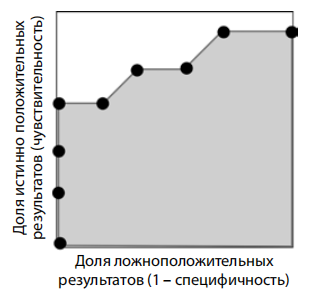

Ее используют для сравнение моделей ML.

**AUC (Area Under Curve, площадь под кривой)** - подходящая метрика для того, чтобы выбрать одну из двух моделей. Площаль под верхней кривой больше, значит, эта модель лучше.

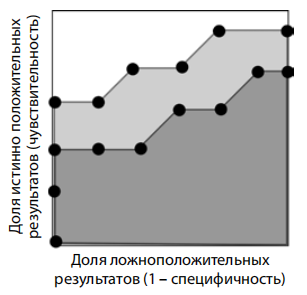

Чем ближе метрика AUC к **1**, тем лучше модель. Если AUC близка к **0,5**, это значит, что модель неудачна: качество ее прогнозов не лучше, чем при случайном гадании.

In [ ]:
# Использование AUC в качестве метрики качества модели
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty=None))

results = cross_val_score(model, X, Y, cv=kfold, scoring="roc_auc")
print(f"AUC = {results.mean():.3f} (ст. откл.= {results.std():.3f})")

Средняя точность: 0.611 (ст. откл.= 0.000)
AUC = 0.814 (ст. откл.= 0.056)


### **Диссбаланс классов**

Одной из проблем ML является **диссбаланс классов**, который возникает, когда в разных классах результатов представлены непропорционально разные объемы данных. 

Эта проблема до сих пор остается открытой, но есть **несколько методов для решения**:

#### 1. **Собрать больше данных**
#### 2. **Использование матрицы ошибок**.
Помогает выявить, как часто модель ошибается на миноритарном классе.

#### 3. **Балансировка выборки**

Дублируем выборки в **миноритарном классе** до тех пор, пока не сравняемся с **мажоритарным**. 

Использование параметра `stratify` в `train_test_split`, чтобы сохранить пропорции классов:

```python
X, Y = …
X_train, X_test, Y_train, Y_test = \
 train_test_split(X, Y, test_size=.33, stratify=Y)
```

##### **Мажорный и минорный**

**Мажоритарный класс (от лат. major - больший)** - это класс, который встречается чаще. 

**Миноритарный класс (от лат. minor - меньший)** - это редкий, меньшинственный класс.

В задачах классификации у нас есть **целевые метки** (например, 0 и 1, или "здоров" и "болен").

- **здоровые (0)** — мажоритарный класс.
- **больные (1)** — миноритарный класс.

**Почему это важно?**
- Модель может научиться всегда **предсказывать только мажоритарный класс**, потому что это часто "выгодно" по общей точности.
- Миноритарный класс (например, реальные случаи болезни) может быть **полностью игнорирован**, а это — большая ошибка в медицинских задачах.

##### **ROC-AUC**
Для сильно несбалансированных классов метрика ROC-AUC подходит плохо, зато можно 
применять PR-AUC. Это похожая метрика, которая характеризует площадь под кривой PR (Precision — Recall, или прецизионность — полнота)

#### 4. **SMOTE (Synthetic Minority Oversampling Technique)**
Метод генерации искусственных примеров миноритарного класса.

Помогает избежать дублирования.

#### 5. **Специализированные модели: обнаружение аномалий**
Аномалии (редкие события) распознаются как выбросы.

Это методы без учителя и не всегда являются классическими классификаторами.

Но могут быть более подходящими, если класс 1 — действительно редкость.
